In [36]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [37]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [38]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [92]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    preds = tx.dot(w)
    return mse(y, preds)

def mse(y, preds):
    """
    :param y: True values of y.
    :param tx: Input values of x.
    :param w: Weights.
    :return: Mean square error between the predicted and true labels.
    """
    
    return 1/2 * np.mean((y - preds)**2)

def mae(y, preds):
    """
    :param y: True values of y.
    :param tx: Input values of x.
    :param w: Weights.
    :return: Mean absolute error between the predicted and true labels.
    """
    
    return np.mean(np.abs(y - preds))



# 2 Grid Search

Fill in the function `grid_search()` below:

In [93]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # INSERT YOUR CODE HERE
    for i, w0_i in enumerate(w0):
        for j, w1_j in enumerate(w1):
            losses[i][j] = compute_loss(y, tx, np.array([w0_i, w1_j]))

    return losses

Let us play with the grid search demo now!

Grid Search: loss*=42.42448314678248, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.014 seconds


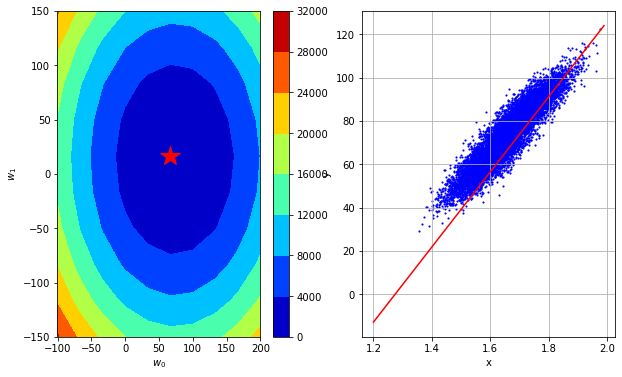

In [94]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=10)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [95]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # print("Y, X, W shapes: ",  y.shape, tx.shape, w.T.shape)
    pred = np.dot(tx, w)
    e = y - pred
    # print("E shape: ", e.shape)
    N = e.shape[0]
    # print("N: ", N)
    gradient = -1/N * np.matmul(tx.T, e)
    # print("G shape: ", gradient.shape)
    return gradient
    # ***************************************************

Please fill in the functions `gradient_descent` below:

In [96]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************

        # ***************************************************
        w = w - gamma * gradient
        # ***************************************************

        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [97]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([100, 10])

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient:  [26.706078   -3.47971243]
Gradient Descent(0/49): loss=378.0473881987588, w0=97.32939220021052, w1=10.347971243498908
Gradient:  [24.0354702  -3.13174119]
Gradient Descent(1/49): loss=309.1417031360723, w0=94.92584518039999, w1=10.661145362647924
Gradient:  [21.63192318 -2.81856707]
Gradient Descent(2/49): loss=253.32809823529618, w0=92.7626528625705, w1=10.943002069882038
Gradient:  [19.46873086 -2.53671037]
Gradient Descent(3/49): loss=208.11907826566738, w0=90.81577977652397, w1=11.19667310639274
Gradient:  [17.52185777 -2.28303933]
Gradient Descent(4/49): loss=171.4997720902681, w0=89.06359399908209, w1=11.424977039252374
Gradient:  [15.769672  -2.0547354]
Gradient Descent(5/49): loss=141.8381340881947, w0=87.4866267993844, w1=11.630450578826043
Gradient:  [14.1927048  -1.84926186]
Gradient Descent(6/49): loss=117.81220730651526, w0=86.06735631965647, w1=11.815376764442345
Gradient:  [12.77343432 -1.66433567]
Gradient Descent(7/49): loss=98.35120661335488, w0=84.79001288

In [66]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 4 Stochastic gradient descent

In [105]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    return compute_gradient(y,tx,w)


def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    # ***************************************************
    #   Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        for batch_y, batch_x in batch_iter(y, tx, batch_size=batch_size):
            loss = compute_loss(y, tx, w)
            gradient = compute_stoch_gradient(batch_y, batch_x, w)
            w = w - gamma * gradient

        ws.append(w)
        losses.append(loss)
        print("Stochastic Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
            bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

In [107]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.2367127591674, w0=5.5302475949461884, w1=-5.243675148998835
Stochastic Gradient Descent(1/49): loss=2486.6262937586716, w0=14.059353558548231, w1=5.257023688282868
Stochastic Gradient Descent(2/49): loss=1803.55924232865, w0=20.619064070034767, w1=11.660897372121685
Stochastic Gradient Descent(3/49): loss=1404.3602610671871, w0=25.22323804907634, w1=7.4055783545045
Stochastic Gradient Descent(4/49): loss=1189.2287681386738, w0=30.511153743269766, w1=7.383562044584995
Stochastic Gradient Descent(5/49): loss=949.1500426046487, w0=34.17377042444025, w1=2.769323617949868
Stochastic Gradient Descent(6/49): loss=837.9352319046483, w0=38.35895463903139, w1=-0.6801653339835267
Stochastic Gradient Descent(7/49): loss=725.8629294144665, w0=39.045371244571264, w1=-1.994326611387517
Stochastic Gradient Descent(8/49): loss=721.5904445689108, w0=44.54470330082741, w1=5.7838649905341715
Stochastic Gradient Descent(9/49): loss=458.25770977994057, w0=46.1937

In [108]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

interactive(children=(IntSlider(value=1, description='n_iter', max=51, min=1), Output()), _dom_classes=('widge…

<function __main__.plot_figure(n_iter)>

# 5 Effect of Outliers

### Exercise 5


# 6 Subgradient Descent

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)